In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
trip_df = pd.read_csv("../data/raw/trips.csv")
cust_df = pd.read_csv("../data/raw/customers.csv")
cust_act_df = pd.read_csv("../data/raw/customer_activity.csv")
promo_df = pd.read_csv("../data/raw/promotions.csv")
promo_redem_df = pd.read_csv("../data/raw/promo_redemptions.csv")

# Data Quality Check

#### Trips Data Quality Check

In [56]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126703 entries, 0 to 126702
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   trip_id           126703 non-null  object 
 1   customer_id       126703 non-null  object 
 2   driver_id         126703 non-null  object 
 3   city              126703 non-null  object 
 4   pickup_area       126703 non-null  object 
 5   dropoff_area      126703 non-null  object 
 6   trip_datetime     126703 non-null  object 
 7   trip_status       126703 non-null  object 
 8   distance_km       122902 non-null  float64
 9   duration_min      122902 non-null  float64
 10  fare_amount       126703 non-null  float64
 11  platform_revenue  126703 non-null  float64
 12  driver_payout     126703 non-null  float64
 13  promo_used        126703 non-null  int64  
 14  surge_multiplier  126703 non-null  float64
dtypes: float64(6), int64(1), object(8)
memory usage: 14.5+ MB


In [57]:
trip_df["trip_date"] = pd.to_datetime(trip_df["trip_datetime"])

In [58]:
trip_df.isnull().sum()

trip_id                0
customer_id            0
driver_id              0
city                   0
pickup_area            0
dropoff_area           0
trip_datetime          0
trip_status            0
distance_km         3801
duration_min        3801
fare_amount            0
platform_revenue       0
driver_payout          0
promo_used             0
surge_multiplier       0
trip_date              0
dtype: int64

In [59]:
trip_df.describe()

,distance_km,duration_min,fare_amount,platform_revenue,driver_payout,promo_used,surge_multiplier,trip_date
count,122902.000000,122902.000000,126703.000000,126703.000000,126703.000000,126703.000000,126703.000000,126703
mean,7.001508,24.992127,12.916523,3.229131,9.687389,0.149878,1.065195,2025-03-07 01:35:02.255511040
min,1.000000,5.000000,0.802000,0.200000,0.600000,0.000000,1.000000,2023-01-04 13:04:00
25%,4.000000,14.900000,7.550000,1.890000,5.660000,0.000000,1.000000,2024-10-10 21:54:00
50%,7.000000,25.000000,12.560000,3.140000,9.420000,0.000000,1.000000,2025-05-10 14:19:00
75%,10.000000,35.000000,17.520000,4.380000,13.140000,0.000000,1.200000,2025-09-20 17:51:30
max,13.000000,45.000000,41.960000,10.490000,31.470000,1.000000,1.500000,2025-12-15 23:19:00
std,3.462483,11.573573,6.915083,1.728775,5.186315,0.356953,0.127807,NaN


In [60]:
#plt.figure(figsize=(25,12))
#sns.heatmap(trip_df.isnull(), annot=True)
#plt.title("Trips Heatmap with Missing Value Column Labels")
#plt.tight_layout()
#plt.show()

In [61]:
trip_df["distance_km"] = trip_df["distance_km"].fillna(trip_df["distance_km"].median())
trip_df["duration_min"] = trip_df["duration_min"].fillna(trip_df["duration_min"].median())

In [62]:
numerical_cols = trip_df.select_dtypes(include="number")
numerical_cols.columns

Index(['distance_km', 'duration_min', 'fare_amount', 'platform_revenue',
       'driver_payout', 'promo_used', 'surge_multiplier'],
      dtype='object')

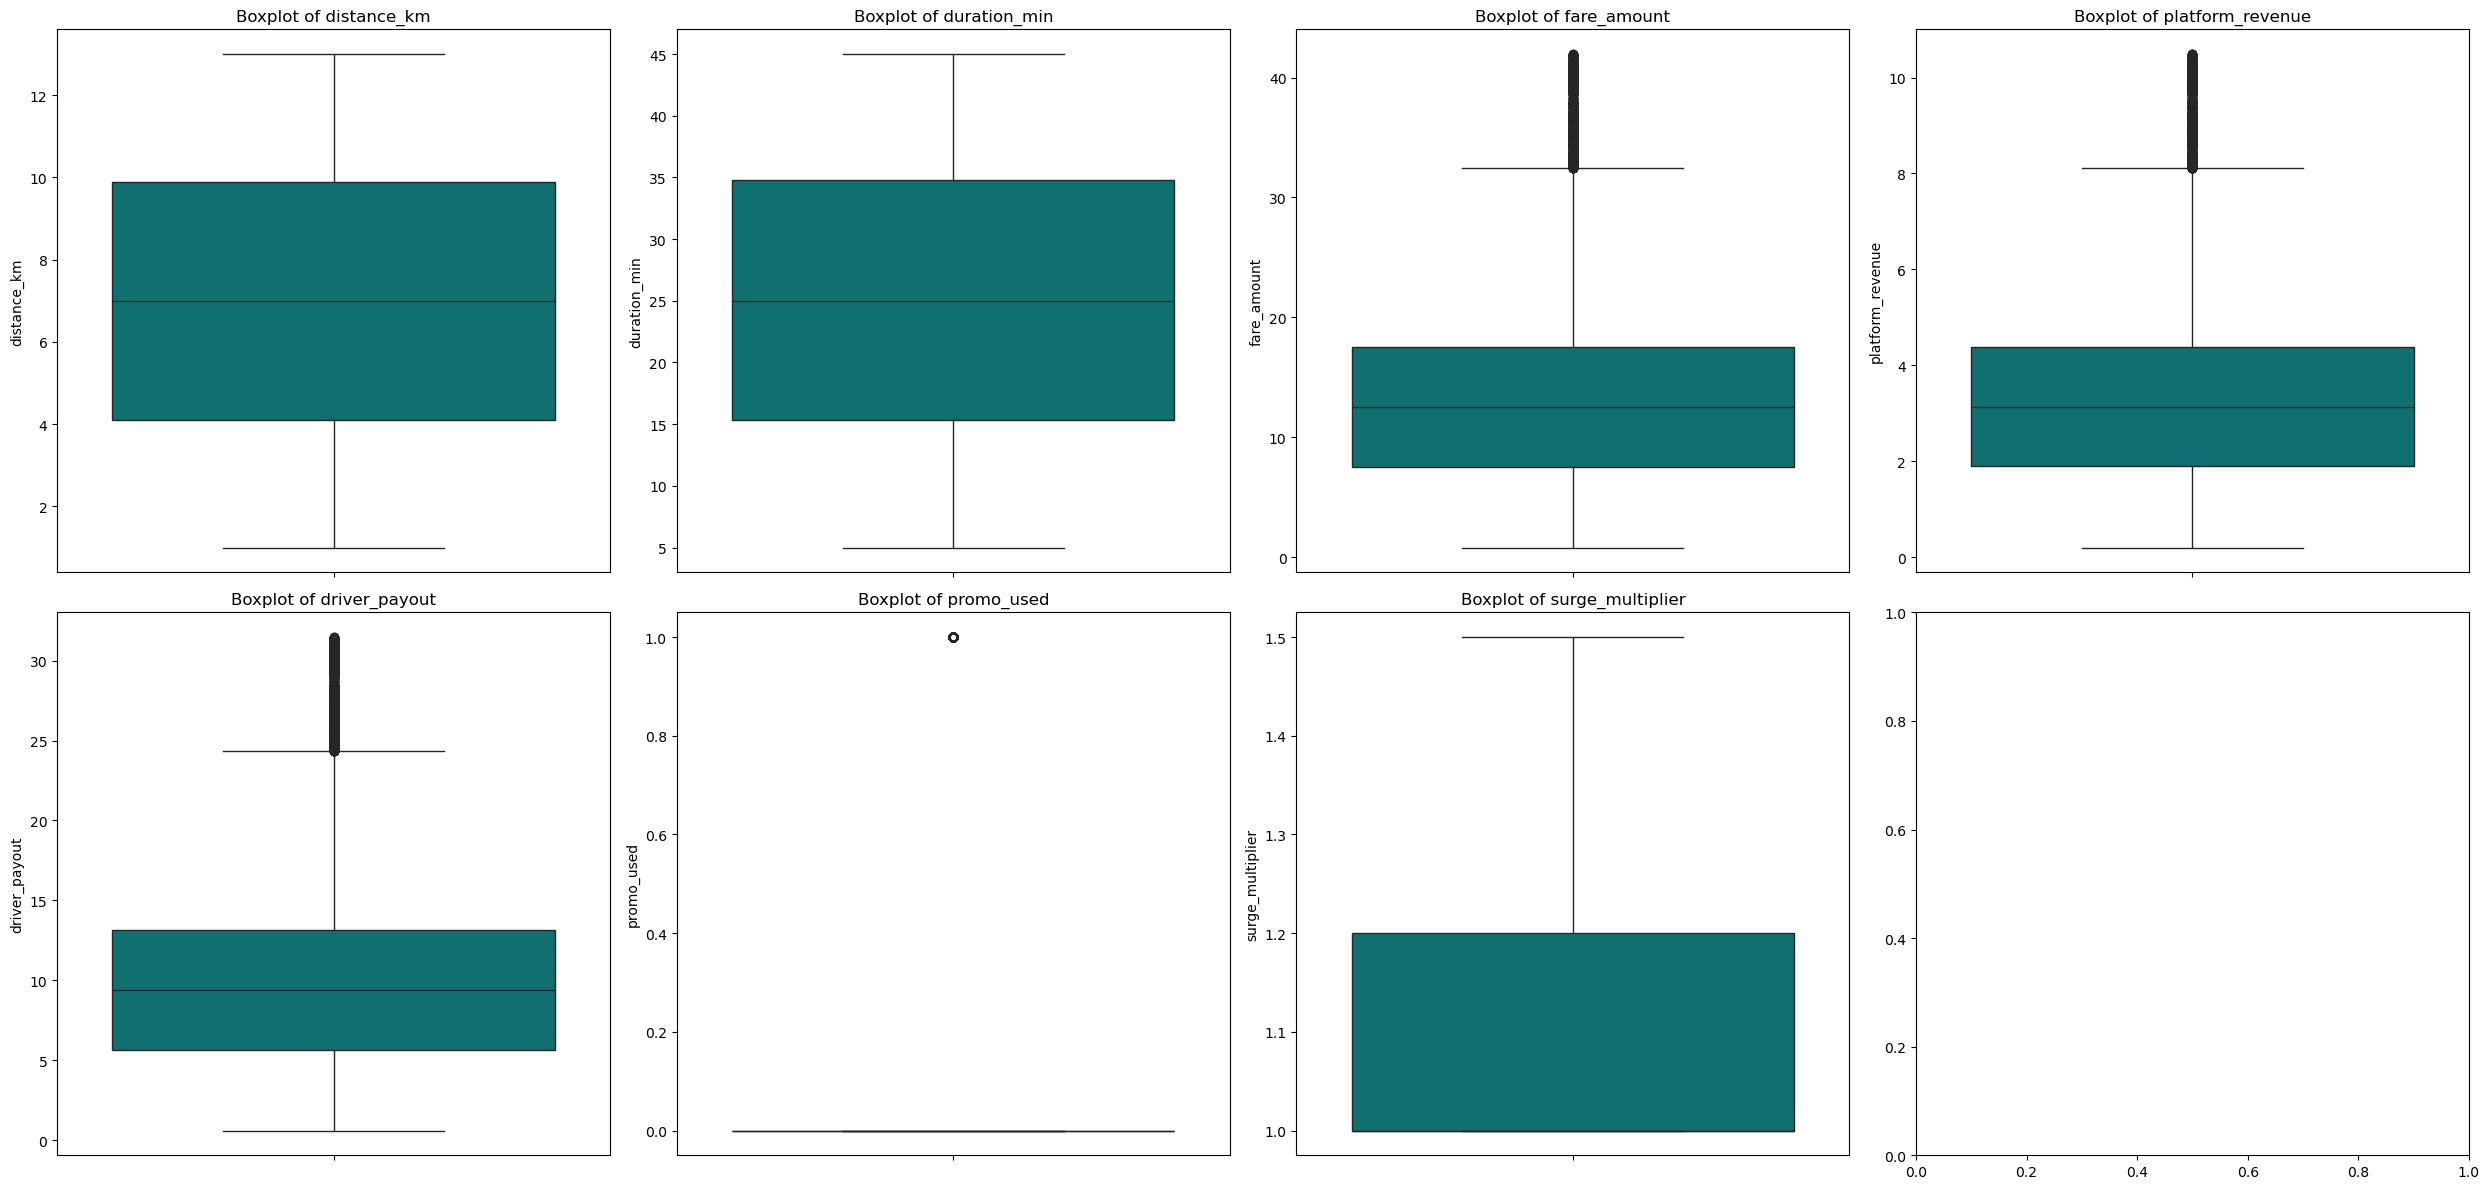

In [63]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25,12))
ax=ax.flatten()
for idx, col in enumerate(numerical_cols):
    sns.boxplot(trip_df[col], ax=ax[idx], color="teal")
    ax[idx].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

##### Handle Outliers

In [64]:
clip_cols = [
    "fare_amount",
    "driver_payout",
    "platform_revenue"
]


In [65]:
for col in clip_cols:
    lower = trip_df[col].quantile(0.05)
    upper = trip_df[col].quantile(0.95)
    
    trip_df[col] = trip_df[col].clip(lower=lower, upper=upper)


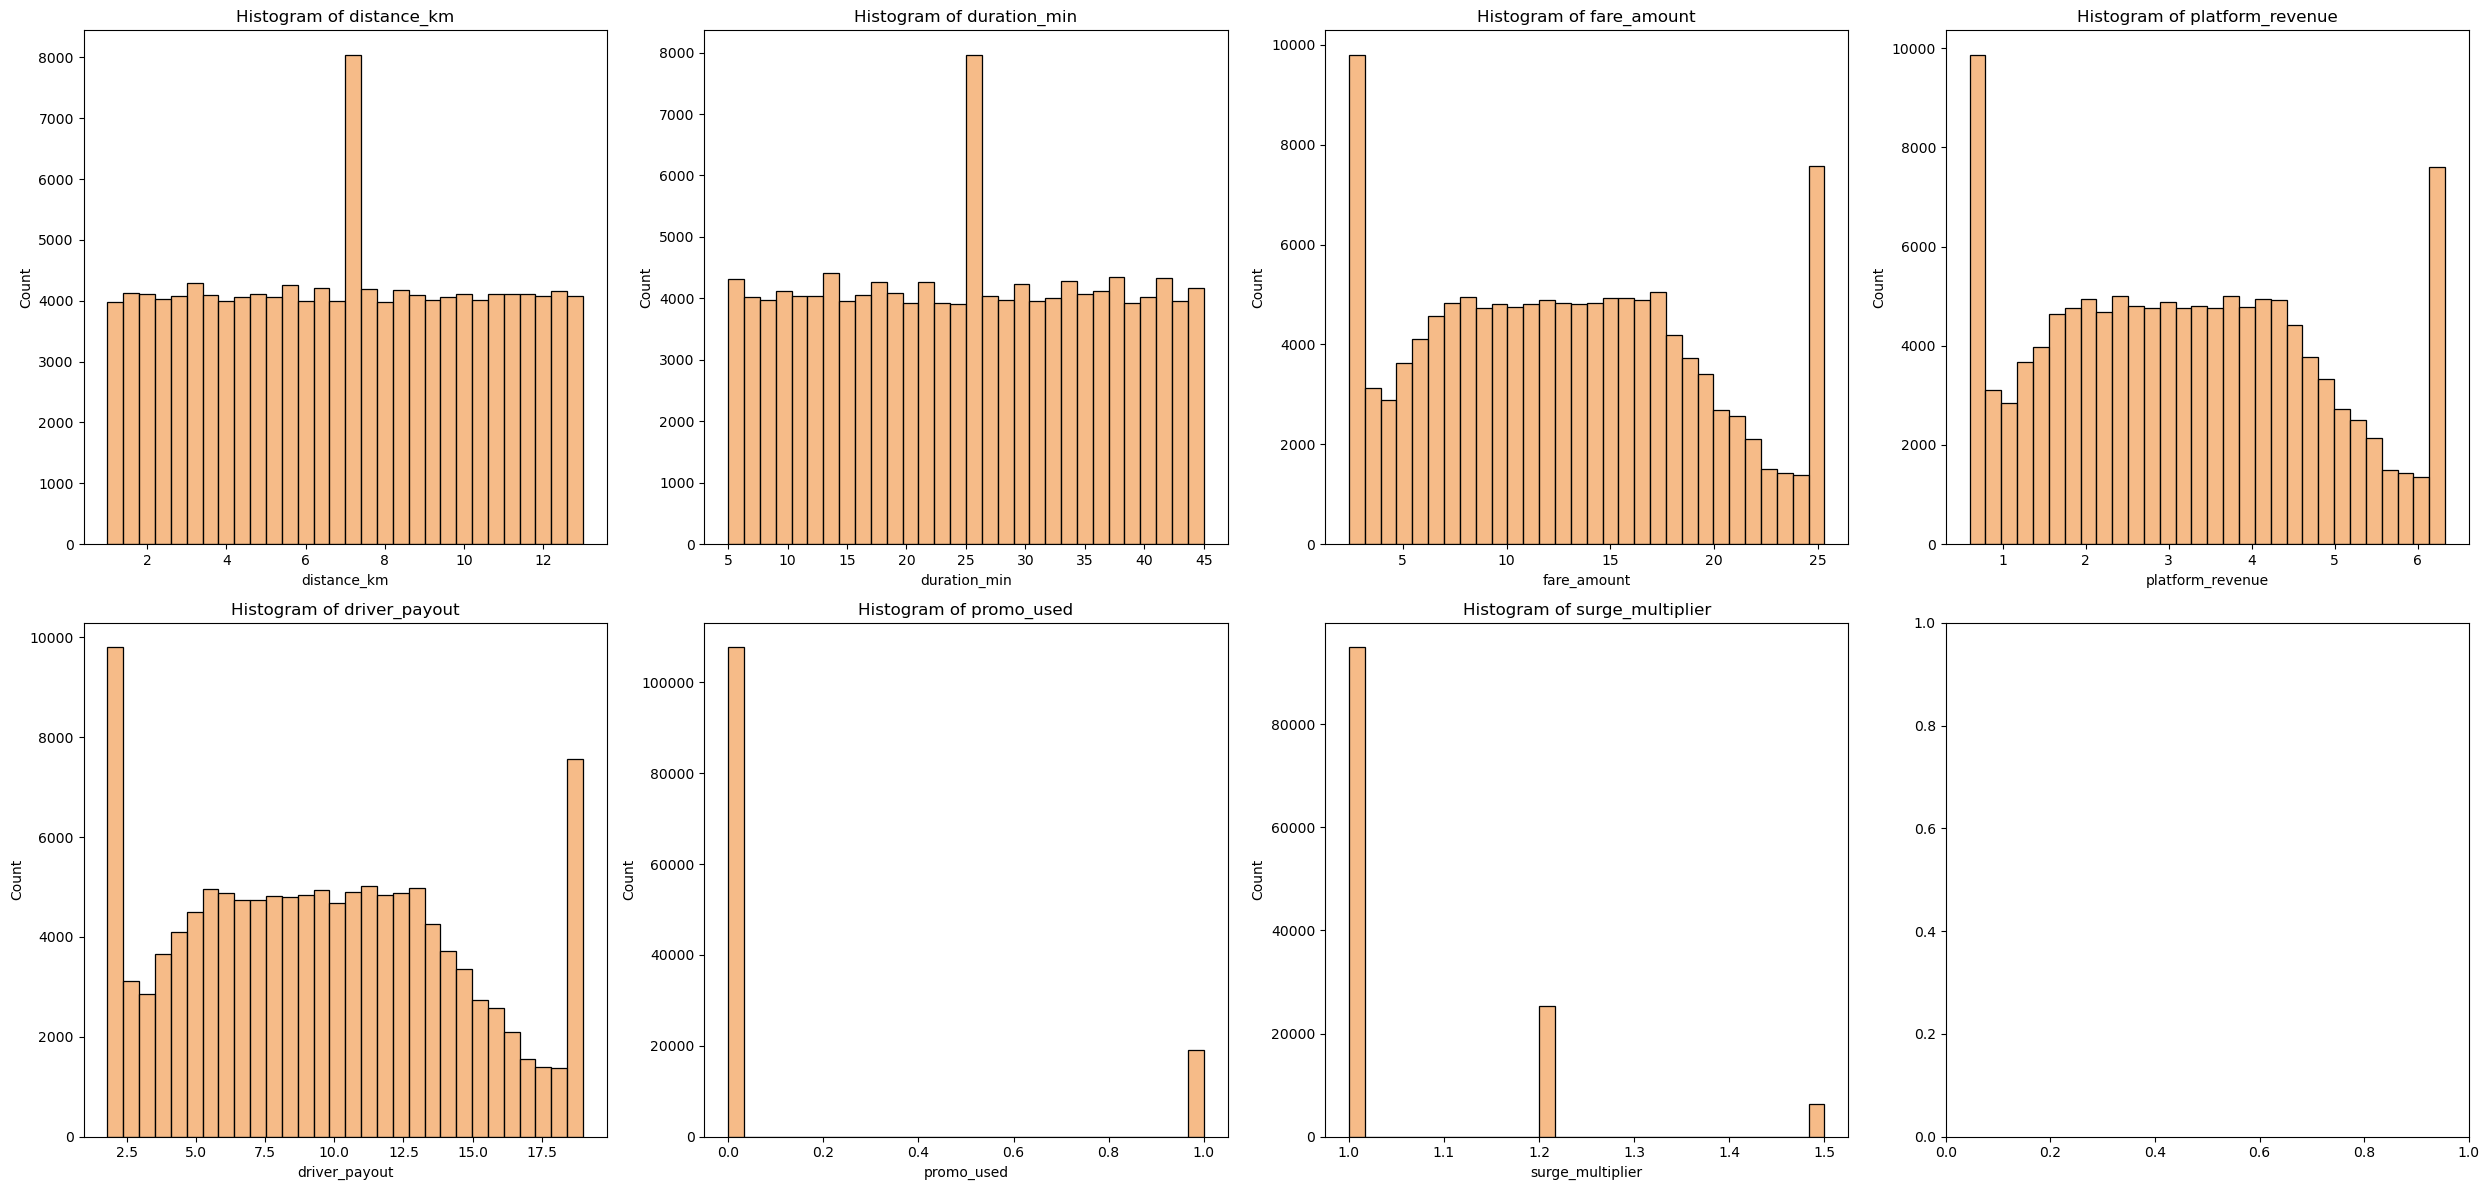

In [66]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25,12))
ax=ax.flatten()
for idx, col in enumerate(numerical_cols):
    sns.histplot(trip_df[col], ax=ax[idx], color="Sandybrown", bins=30)
    ax[idx].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

#### Customer Data Quality Check

In [67]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           3000 non-null   object 
 1   first_name            3000 non-null   object 
 2   last_name             3000 non-null   object 
 3   email                 3000 non-null   object 
 4   phone                 3000 non-null   object 
 5   city                  3000 non-null   object 
 6   signup_date           3000 non-null   object 
 7   age                   3000 non-null   int64  
 8   gender                3000 non-null   object 
 9   total_trips           3000 non-null   int64  
 10  cancelled_trips       3000 non-null   int64  
 11  days_since_last_trip  3000 non-null   int64  
 12  churned               3000 non-null   int64  
 13  engagement_score      3000 non-null   float64
 14  loyalty_score         3000 non-null   float64
 15  persona              

In [68]:
cust_df["signup_date"] = pd.to_datetime(cust_df["signup_date"])

In [69]:
cust_df.describe()

,signup_date,age,total_trips,cancelled_trips,days_since_last_trip,churned,engagement_score,loyalty_score
count,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2024-06-01 00:56:38.400000,42.905333,42.234333,3.104333,21.240667,0.183000,0.999298,0.858423
min,2023-01-01 00:00:00,18.000000,1.000000,0.000000,0.000000,0.000000,0.893000,0.566000
25%,2023-09-22 00:00:00,30.000000,32.000000,1.000000,6.000000,0.000000,1.000000,0.800000
50%,2024-05-20 00:00:00,43.000000,41.000000,3.000000,15.000000,0.000000,1.000000,0.856000
75%,2025-02-09 00:00:00,56.000000,51.000000,5.000000,30.000000,0.000000,1.000000,0.919000
max,2025-11-14 00:00:00,68.000000,118.000000,17.000000,167.000000,1.000000,1.000000,1.000000
std,NaN,14.851012,15.095387,2.495634,21.798298,0.386731,0.006107,0.084453


In [70]:
numerical_cols = cust_df.select_dtypes(include="number")
numerical_cols.columns

Index(['age', 'total_trips', 'cancelled_trips', 'days_since_last_trip',
       'churned', 'engagement_score', 'loyalty_score'],
      dtype='object')

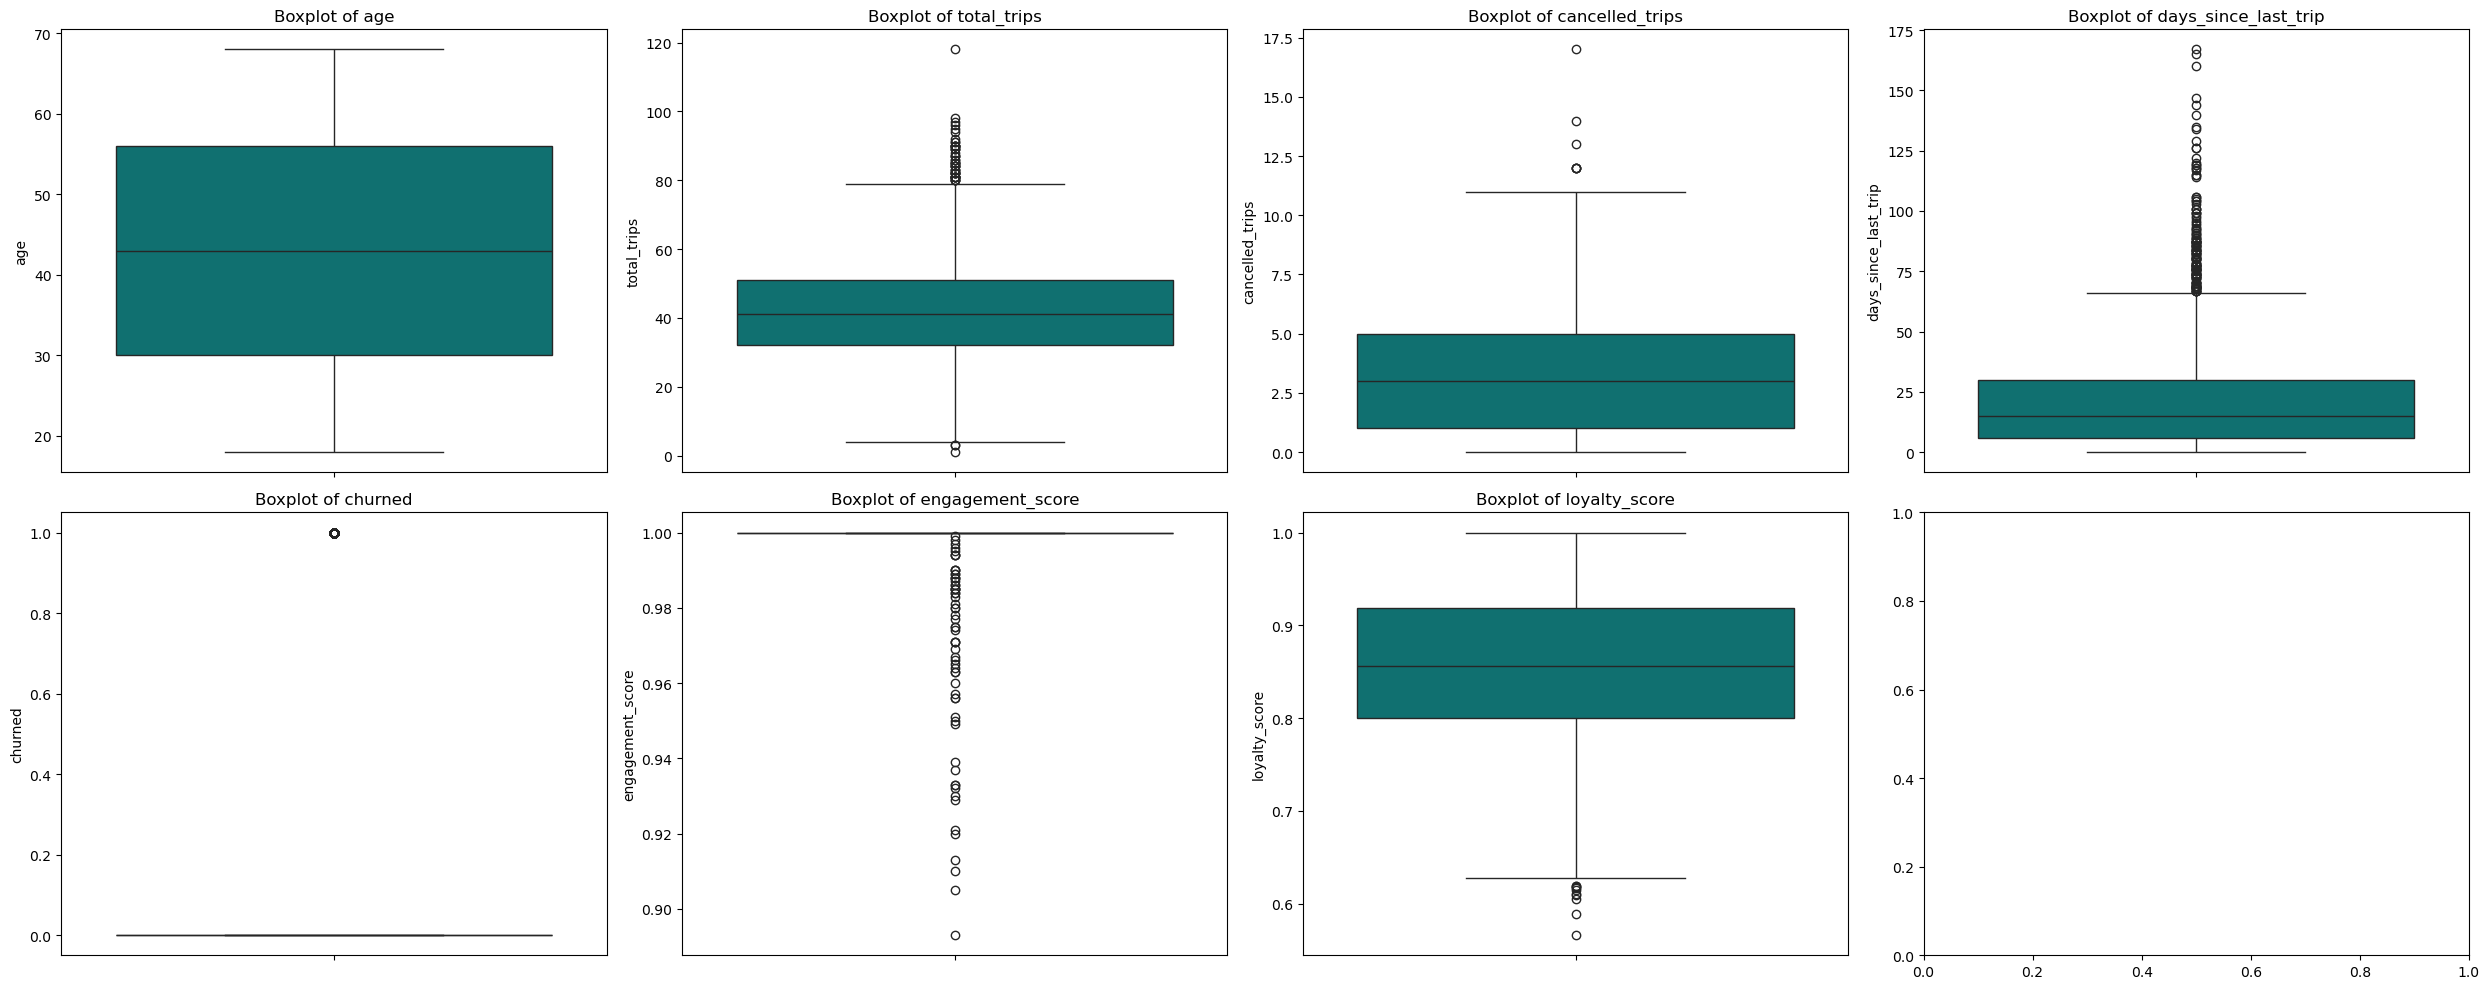

In [71]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25,10))
ax=ax.flatten()
for idx, col in enumerate(numerical_cols):
    sns.boxplot(cust_df[col], ax=ax[idx], color="teal")
    ax[idx].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

##### Handling Outliers

In [72]:
clip_cols = [
    "total_trips",
    "days_since_last_trip",
    "engagement_score",
    "loyalty_score",
    "cancelled_trips"
]

In [73]:
for col in clip_cols:
    lower = cust_df[col].quantile(0.05)
    upper = cust_df[col].quantile(0.95)
    
    cust_df[col] = cust_df[col].clip(lower=lower, upper=upper)


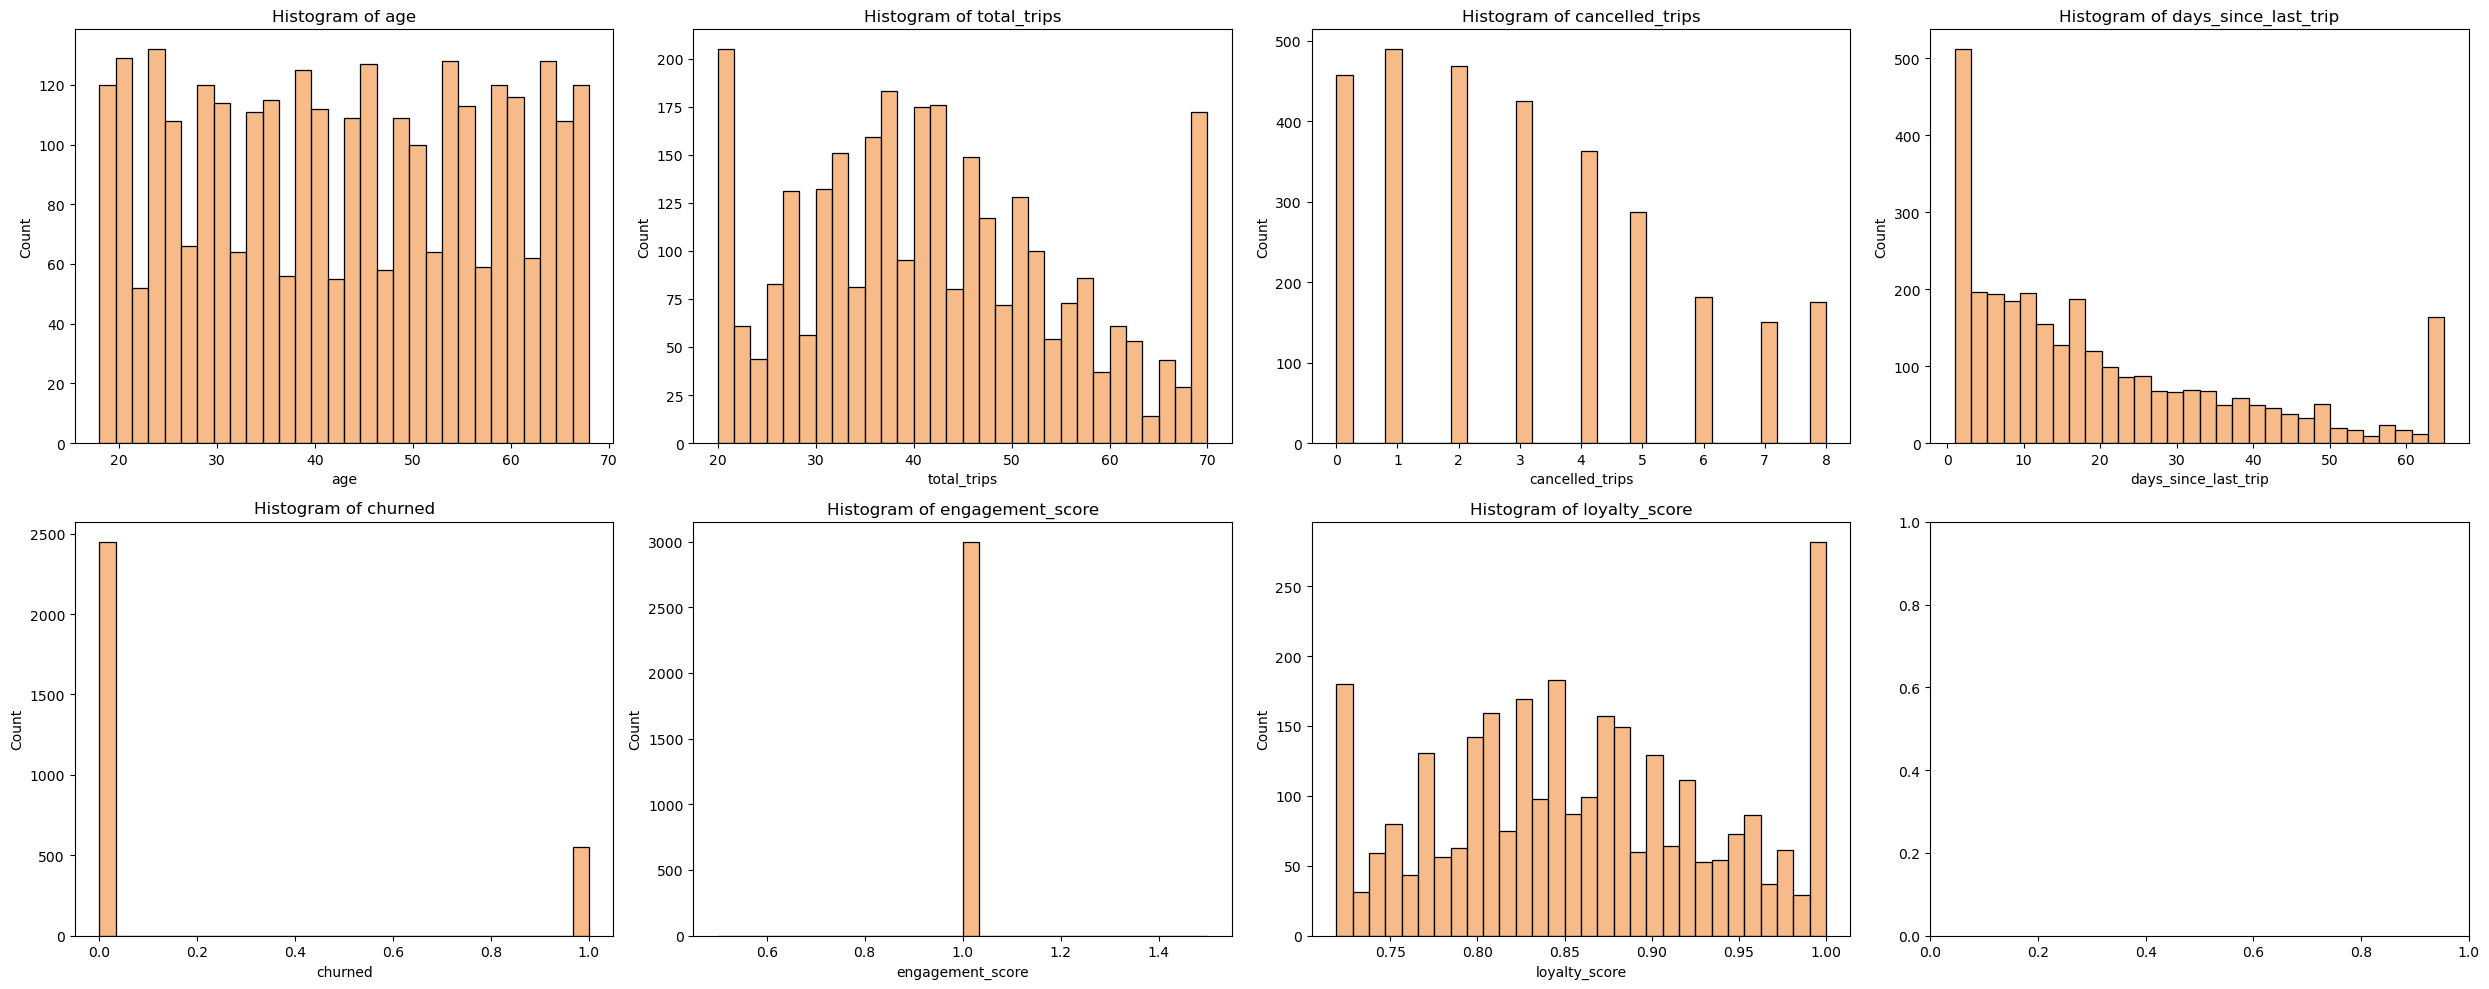

In [74]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25,10))
ax=ax.flatten()
for idx, col in enumerate(numerical_cols):
    sns.histplot(cust_df[col], ax=ax[idx], color="Sandybrown", bins=30)
    ax[idx].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

#### Customer Activity Data Quality Check

In [75]:
cust_act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485985 entries, 0 to 485984
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  485985 non-null  object
 1   session_id   485985 non-null  object
 2   event_date   485985 non-null  object
 3   event_type   485985 non-null  object
dtypes: object(4)
memory usage: 14.8+ MB


In [76]:
cust_act_df["event_date"] = pd.to_datetime(cust_act_df["event_date"])

In [77]:
cust_act_df.describe()

,event_date
count,485985
mean,2025-10-17 04:46:06.574276864
min,2025-08-17 00:00:00
25%,2025-09-17 00:00:00
50%,2025-10-18 00:00:00
75%,2025-11-16 00:00:00
max,2025-12-15 00:00:00


#### Promotion Data Quality Check

In [78]:
promo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   promo_id        40 non-null     object 
 1   promo_name      40 non-null     object 
 2   promo_type      40 non-null     object 
 3   discount_value  40 non-null     float64
 4   start_date      40 non-null     object 
 5   end_date        40 non-null     object 
 6   usage_limit     40 non-null     int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ KB


In [79]:
promo_df["start_date"] = pd.to_datetime(promo_df["start_date"])
promo_df["end_date"] = pd.to_datetime(promo_df["end_date"])

In [80]:
promo_df.describe()

,discount_value,start_date,end_date,usage_limit
count,40.000000,40,40,40.000000
mean,15.640000,2024-08-15 04:48:00,2024-09-16 03:00:00,2729.175000
min,3.180000,2023-01-30 00:00:00,2023-02-23 00:00:00,226.000000
25%,11.292500,2023-12-12 00:00:00,2024-01-24 12:00:00,1805.750000
50%,15.390000,2024-09-11 12:00:00,2024-10-06 00:00:00,2587.000000
75%,21.250000,2025-04-06 12:00:00,2025-05-13 06:00:00,3852.750000
max,30.000000,2025-12-14 00:00:00,2025-12-31 00:00:00,4849.000000
std,7.490965,NaN,NaN,1423.695856


In [81]:
numerical_cols = promo_df.select_dtypes(include="number")
numerical_cols.columns

Index(['discount_value', 'usage_limit'], dtype='object')

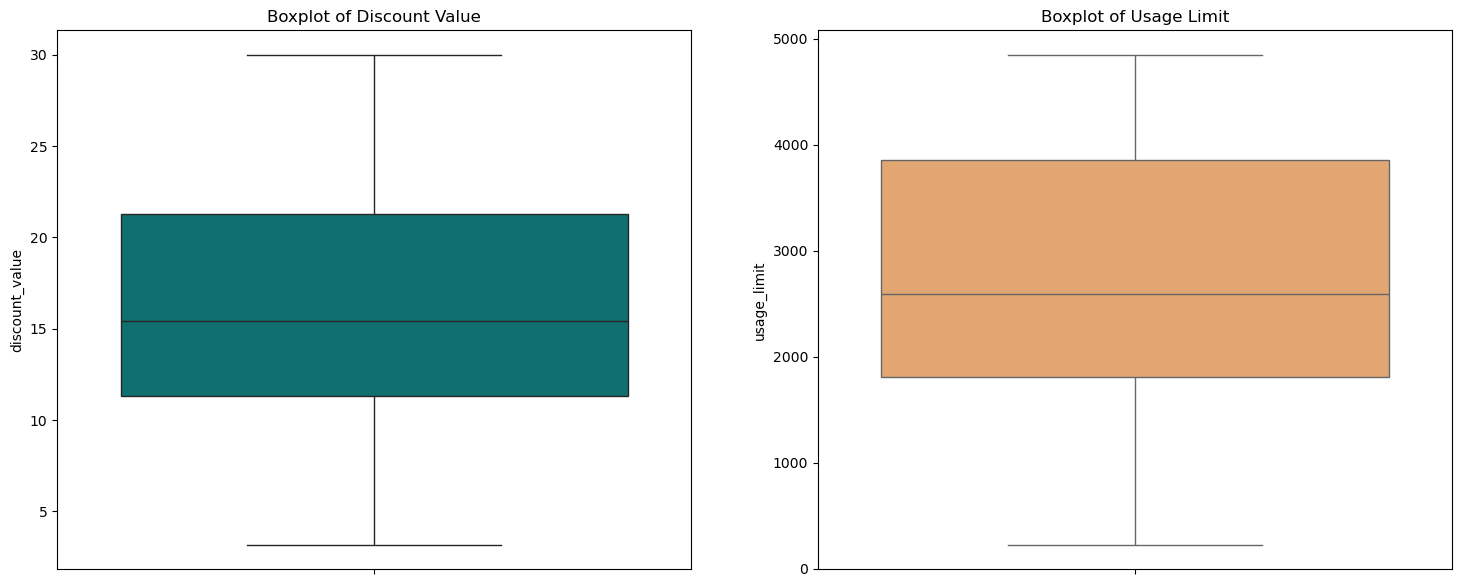

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,7))
ax=ax.flatten()

sns.boxplot(promo_df["discount_value"], color="teal", ax=ax[0])
ax[0].set_title("Boxplot of Discount Value")

sns.boxplot(promo_df["usage_limit"], color="Sandybrown", ax=ax[1])
ax[1].set_title("Boxplot of Usage Limit")
plt.show()

#### Promo Redemptions Quality Check

In [83]:
promo_redem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11394 entries, 0 to 11393
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   trip_id        11394 non-null  object 
 1   customer_id    11394 non-null  object 
 2   promo_id       11394 non-null  object 
 3   promo_name     11394 non-null  object 
 4   redeemed_date  11394 non-null  object 
 5   promo_cost     11394 non-null  float64
dtypes: float64(1), object(5)
memory usage: 534.2+ KB


In [84]:
promo_redem_df["redeemed_date"] = pd.to_datetime(promo_redem_df["redeemed_date"])

In [85]:
promo_redem_df.describe()

,redeemed_date,promo_cost
count,11394,11394.000000
mean,2025-03-07 06:31:16.777251328,11.339232
min,2023-01-04 00:00:00,1.590000
25%,2024-10-12 00:00:00,7.060000
50%,2025-05-10 00:00:00,10.780000
75%,2025-09-20 00:00:00,14.697500
max,2025-12-15 00:00:00,32.970000
std,NaN,6.054000


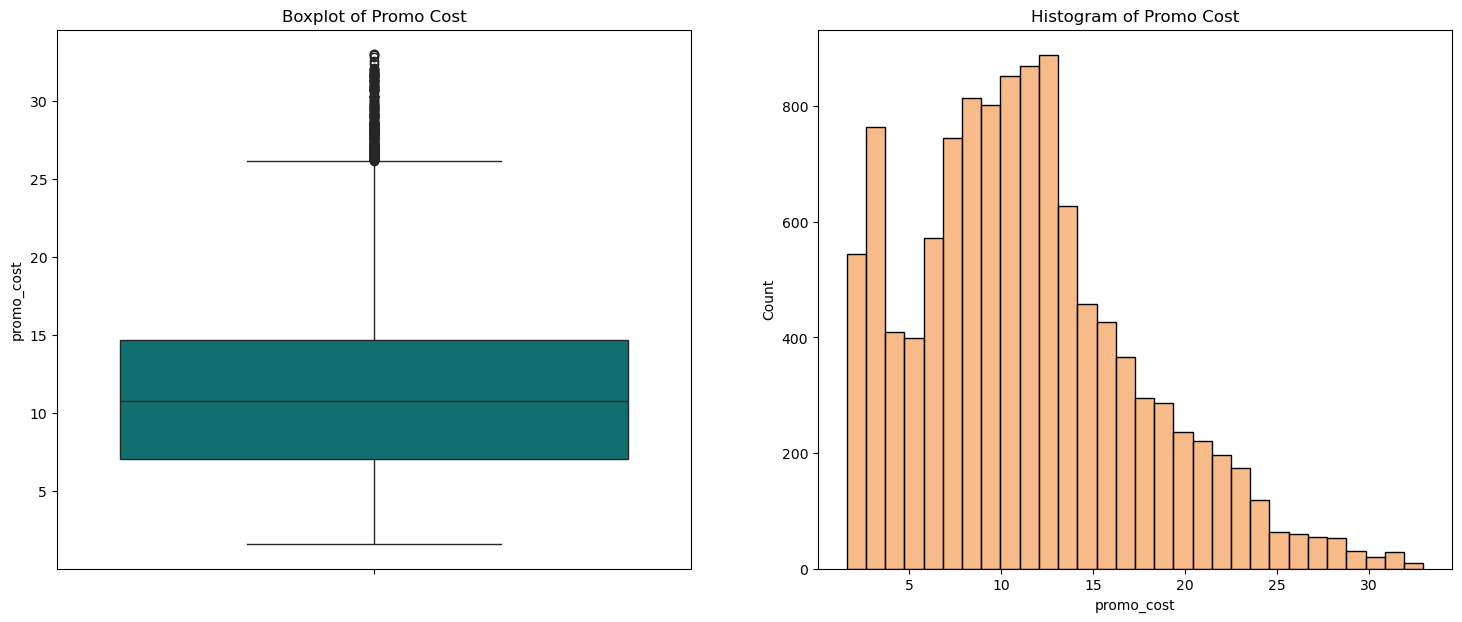

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,7))
ax=ax.flatten()

sns.boxplot(promo_redem_df["promo_cost"], color="teal", ax=ax[0])
ax[0].set_title("Boxplot of Promo Cost")

sns.histplot(promo_redem_df["promo_cost"], color="Sandybrown", bins=30, ax=ax[1])
ax[1].set_title("Histogram of Promo Cost")
plt.show()

In [87]:
trips = trip_df.copy()

customers = cust_df.copy()

activity = cust_act_df.copy()

promotions = promo_df.copy()

promo_redeemed = promo_redem_df.copy()

### Data Quality Check Summary

##### **Trip**
Trip date was formatted to a datetime.
distance_km and duration_min  has a missing value of 3% (3801 out of 126702) and were filled with the median values.
Few outliers in driver_payout, fare_amount and platform_revenue columns and were clipped at 5th & 95th percentile.

##### **Customer**
Sign up date was formatted to a datetime. Few outliers in date_since_last_trip, total_trp and engagement_score columns and were clipped at 5th & 95th percentile.

##### **Customer Activity**
Event date was formatted to a datetime.

##### **Promo**
Start date and end date were formatted to a datetime. 

##### **Promo Redem**
Redeemed date was formatted to a datetime.

# Exploratory Data Analysis

##### Ensure date columns are datetime

In [88]:
trips["trip_date"] = pd.to_datetime(trips["trip_date"])
customers["signup_date"] = pd.to_datetime(customers["signup_date"])
activity["event_date"] = pd.to_datetime(activity["event_date"])
promotions["start_date"] = pd.to_datetime(promotions["start_date"])
promotions["end_date"] = pd.to_datetime(promotions["end_date"])
promo_redeemed["redeemed_date"] = pd.to_datetime(promo_redeemed["redeemed_date"])

##### Choose a safe snapshot_date (30 days before latest common date)

In [89]:
# Use datasets that represent "behaviour" feeding your prediction features.
latest_common_date = min(
    trips["trip_date"].max(),
    activity["event_date"].max(),
    promo_redeemed["redeemed_date"].max()
)

snapshot_date = latest_common_date - pd.Timedelta(days=30)
print("latest_common_date:", latest_common_date)
print("snapshot_date:", snapshot_date)


latest_common_date: 2025-12-15 00:00:00
snapshot_date: 2025-11-15 00:00:00


##### convert snapshot to date & define recent trips

In [90]:
snapshot_date = pd.to_datetime("2025-11-21")

trips_recent = trips[
    (trips["trip_date"] <= snapshot_date) &
    (trips["trip_date"] >= snapshot_date - pd.Timedelta(days=30))
]

##### Aggregate TRIPS to customer-level features

In [91]:
trip_feats = trips_recent.groupby("customer_id").agg(
    trips_30d=("trip_id", "nunique"),
    completed_trips_30d=("trip_status", lambda s: (s == "completed").sum()),
    cancelled_trips_30d=("trip_status", lambda s: (s == "cancelled").sum()),
    total_fare_30d=("fare_amount", "sum"),
    avg_fare_30d=("fare_amount", "mean"),
    total_distance_30d=("distance_km", "sum"),
    avg_duration_30d=("duration_min", "mean"),
    promo_used_trips_30d=("promo_used", "sum"),
    last_trip_date=("trip_date", "max"),
).reset_index()

trip_feats["recency_days"] = (snapshot_date - trip_feats["last_trip_date"]).dt.days

##### Aggregate ACTIVITY to customer-level features

In [92]:
# Create recent activity window (last 30 days before snapshot_date)
activity_recent = activity[
    (activity["event_date"] <= snapshot_date) &
    (activity["event_date"] >= snapshot_date - pd.Timedelta(days=30))
]

activity_feats = activity_recent.pivot_table(
    index="customer_id",
    columns="event_type",
    values="session_id",
    aggfunc="count",
    fill_value=0
).reset_index()

# total activity events in last 30 days
event_cols = [c for c in activity_feats.columns if c != "customer_id"]
activity_feats["total_events_30d"] = activity_feats[event_cols].sum(axis=1)

##### Merge PROMO_REDEEMED with PROMOTIONS (to know promo attributes)

In [93]:
# Filter to last 30 days before snapshot_date
promo_red_recent = promo_redeemed[
    (promo_redeemed["redeemed_date"] <= snapshot_date) &
    (promo_redeemed["redeemed_date"] >= snapshot_date - pd.Timedelta(days=30))
]

promo_red_feats = promo_red_recent.merge(
    promotions[["promo_id", "promo_type", "discount_value"]],
    on="promo_id",
    how="left"
)

promo_feats = promo_red_feats.groupby("customer_id").agg(
    promos_redeemed_30d=("promo_id", "nunique"),
    promo_cost_30d=("promo_cost", "sum"),
    avg_discount_value_30d=("discount_value", "mean"),
).reset_index()

##### Final merge: start from customers, then left-join features

In [94]:
model_df = customers.copy()

model_df = model_df.merge(trip_feats, on="customer_id", how="left")
model_df = model_df.merge(activity_feats, on="customer_id", how="left")
model_df = model_df.merge(promo_feats, on="customer_id", how="left")

# Fill missing feature values from the merge results(customers with no recent activity)
feature_cols = [c for c in model_df.columns if c not in ["customer_id", "city", "signup_date", "gender", "persona", "signup_channel", "income_level", "churned"]]
model_df[feature_cols] = model_df[feature_cols].fillna(0)

In [95]:
print(model_df.shape)
model_df.head()

(3000, 38)


,customer_id,first_name,last_name,email,phone,city,signup_date,age,gender,total_trips,...,last_trip_date,recency_days,app_open,ride_completed,ride_request,search,total_events_30d,promos_redeemed_30d,promo_cost_30d,avg_discount_value_30d
0,CUST00000,Adrian,Walker,adrian.walker@gmail.com,020 7946 0251,London,2024-04-27,19,Other,63,...,2025-11-18 19:10:00,2.0,19,4,5,10,38,0.0,0.0,0.00
1,CUST00001,Tony,Jones,tony.jones@hotmail.co.uk,+441164960985,London,2023-10-01,61,Other,52,...,0,0.0,20,4,7,14,45,0.0,0.0,0.00
2,CUST00002,Lynn,Carter,lynn.carter@outlook.com,+44(0)20 7496 0628,London,2025-01-22,31,Male,47,...,2025-11-19 17:36:00,1.0,7,2,2,4,15,1.0,6.6,12.28
3,CUST00003,Marcelo,Madrigal,marcelo.madrigal@hotmail.com,+34987 210 730,Barcelona,2025-03-01,55,Female,44,...,2025-11-05 16:01:00,15.0,23,9,9,17,58,0.0,0.0,0.00
4,CUST00004,Faye,Strik,faye.strik@hotmail.com,086 1284110,Amsterdam,2025-09-13,27,Male,30,...,2025-11-15 18:25:00,5.0,24,8,11,15,58,0.0,0.0,0.00


In [96]:
model_df.to_csv("../data/processed/model_df.csv", index=False)

### EDA

In [97]:
model_df.columns

Index(['customer_id', 'first_name', 'last_name', 'email', 'phone', 'city',
       'signup_date', 'age', 'gender', 'total_trips', 'cancelled_trips',
       'days_since_last_trip', 'churned', 'engagement_score', 'loyalty_score',
       'persona', 'signup_channel', 'income_level', 'payment_method',
       'device_type', 'trips_30d', 'completed_trips_30d',
       'cancelled_trips_30d', 'total_fare_30d', 'avg_fare_30d',
       'total_distance_30d', 'avg_duration_30d', 'promo_used_trips_30d',
       'last_trip_date', 'recency_days', 'app_open', 'ride_completed',
       'ride_request', 'search', 'total_events_30d', 'promos_redeemed_30d',
       'promo_cost_30d', 'avg_discount_value_30d'],
      dtype='object')

In [98]:
model_df["signup_day"] = model_df["signup_date"].dt.day_name()
model_df["signup_month"] = model_df["signup_date"].dt.month_name()
model_df["signup_year"] = model_df["signup_date"].dt.year
model_df["signup_year_month"] = model_df["signup_date"].dt.strftime("%b-%Y")

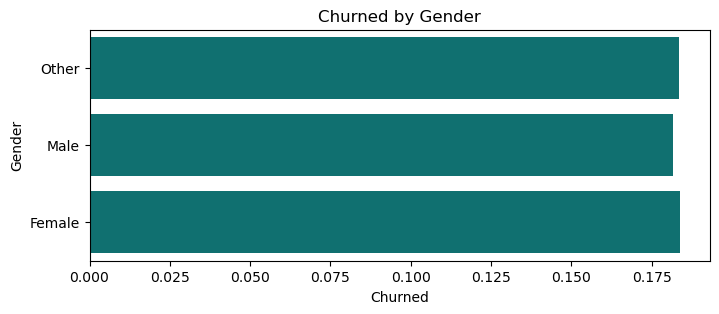

In [99]:
plt.figure(figsize=(8,3))
sns.barplot(x="churned", data=model_df, y="gender", color="teal", errorbar=None)
plt.title("Churned by Gender")
plt.xlabel("Churned")
plt.ylabel("Gender")
plt.show()

##### Insight
**churned** happened a lot in **female & Other** gender

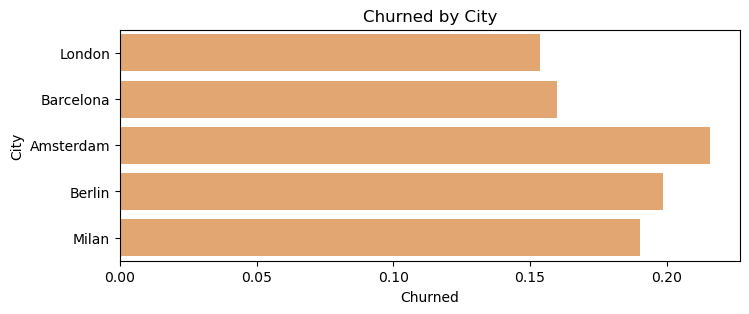

In [100]:
plt.figure(figsize=(8,3))
sns.barplot(x="churned", y="city", data=model_df, color="Sandybrown", errorbar=None)
plt.title("Churned by City")
plt.xlabel("Churned")
plt.ylabel("City")
plt.show()

##### Insight
**Amsterdam** city experienced highest churn while **Berlin** lowest

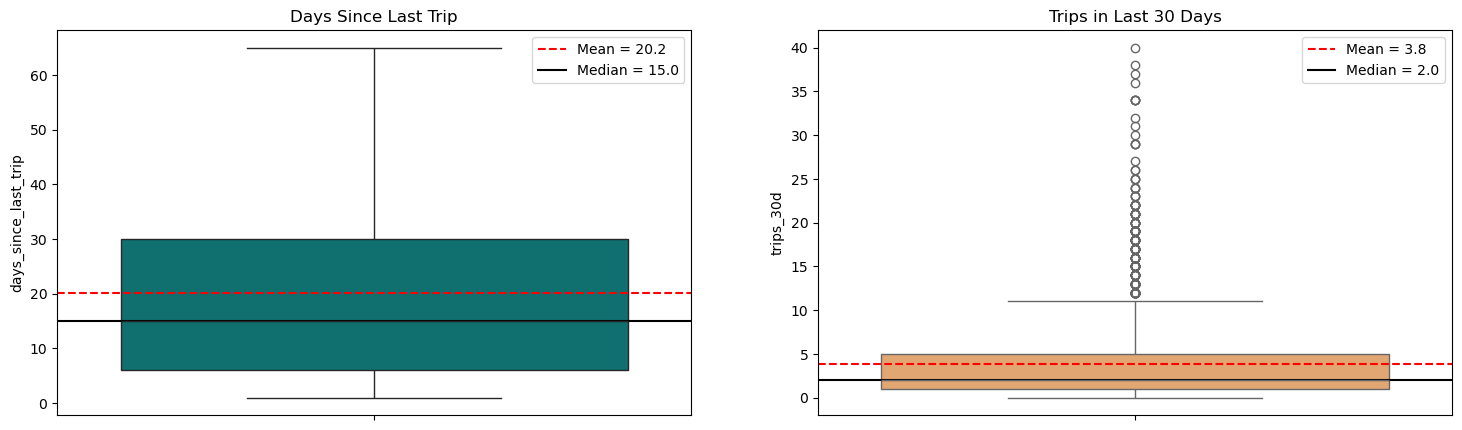

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
ax = ax.flatten()

# Days Since Last Trip 
sns.boxplot(y="days_since_last_trip", data=model_df, color="teal", ax=ax[0])

mean_days = model_df["days_since_last_trip"].mean()
median_days = model_df["days_since_last_trip"].median()

ax[0].axhline(mean_days, color="red", linestyle="--", label=f"Mean = {mean_days:.1f}")
ax[0].axhline(median_days, color="black", linestyle="-", label=f"Median = {median_days:.1f}")

ax[0].set_title("Days Since Last Trip")
ax[0].legend()

# Trips in Last 30 Days
sns.boxplot(y="trips_30d", data=model_df, color="sandybrown", ax=ax[1])

mean_trips = model_df["trips_30d"].mean()
median_trips = model_df["trips_30d"].median()

ax[1].axhline(mean_trips, color="red", linestyle="--", label=f"Mean = {mean_trips:.1f}")
ax[1].axhline(median_trips, color="black", linestyle="-", label=f"Median = {median_trips:.1f}")

ax[1].set_title("Trips in Last 30 Days")
ax[1].legend()

plt.show()


##### Insight
While the typical customer last used the service about 15 days ago, a smaller but important group has been inactive for much longer (20days), pushing the average to over three weeks.
**Half of customers** took two trips in the last 30 days while **average customer** took about 4 trip in the last month, indicating a low customer engagement.

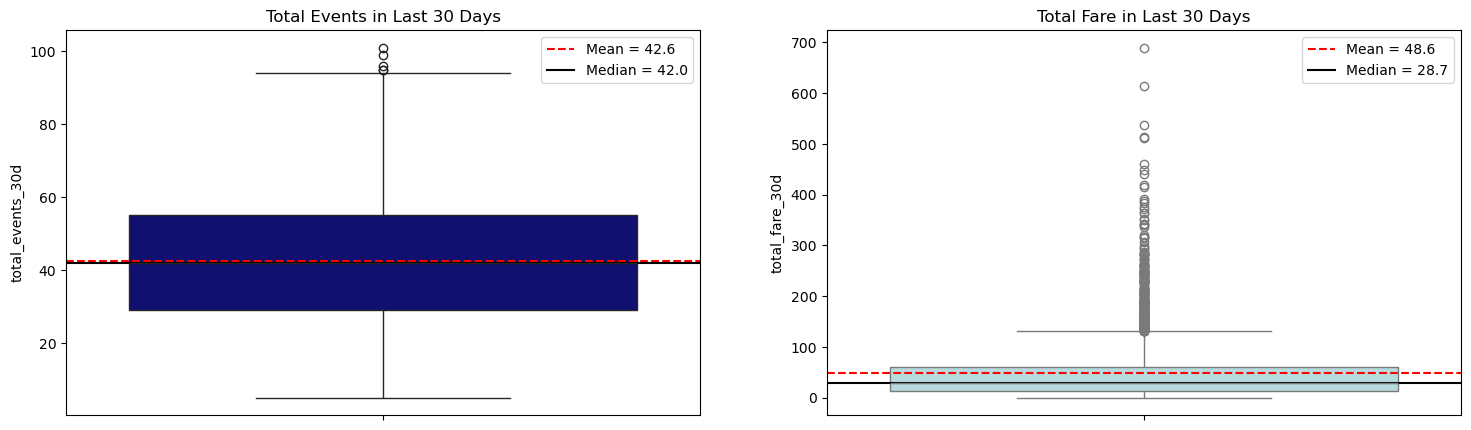

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
ax = ax.flatten()

# Total Events in Last 30 Days
sns.boxplot(y="total_events_30d", data=model_df, color="navy", ax=ax[0])

mean_days = model_df["total_events_30d"].mean()
median_days = model_df["total_events_30d"].median()

ax[0].axhline(mean_days, color="red", linestyle="--", label=f"Mean = {mean_days:.1f}")
ax[0].axhline(median_days, color="black", linestyle="-", label=f"Median = {median_days:.1f}")

ax[0].set_title("Total Events in Last 30 Days")
ax[0].legend()


# Total Fare in Last 30 Days
sns.boxplot(y="total_fare_30d", data=model_df, color="powderblue", ax=ax[1])

mean_trips = model_df["total_fare_30d"].mean()
median_trips = model_df["total_fare_30d"].median()

ax[1].axhline(mean_trips, color="red", linestyle="--", label=f"Mean = {mean_trips:.1f}")
ax[1].axhline(median_trips, color="black", linestyle="-", label=f"Median = {median_trips:.1f}")

ax[1].set_title("Total Fare in Last 30 Days")
ax[1].legend()

plt.show()

##### Insight
Most customers interact with the app frequently, but a smaller group shows slight but insignificant higher activity, slightly increasing the average.
While the typical customer spends just over £28 per month, a smaller group of high-value users significantly increases average revenue (£48.6), making their retention strategically important.

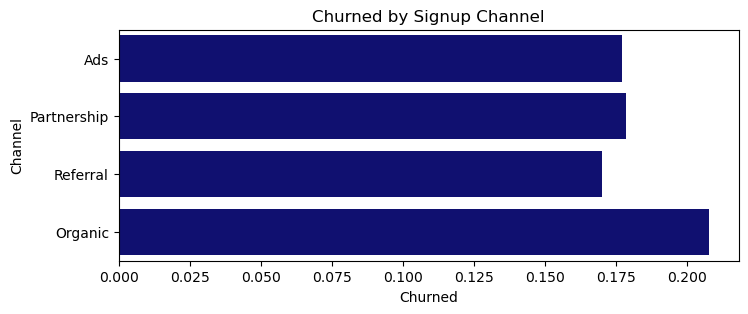

In [103]:
plt.figure(figsize=(8,3))
sns.barplot(x="churned", y="signup_channel", data=model_df, color="navy", errorbar=None)
plt.title("Churned by Signup Channel")
plt.xlabel("Churned")
plt.ylabel("Channel")
plt.show()

##### Insight
Customer signed in via **Organic channel** churned more and **referral channel** a bit more reliable

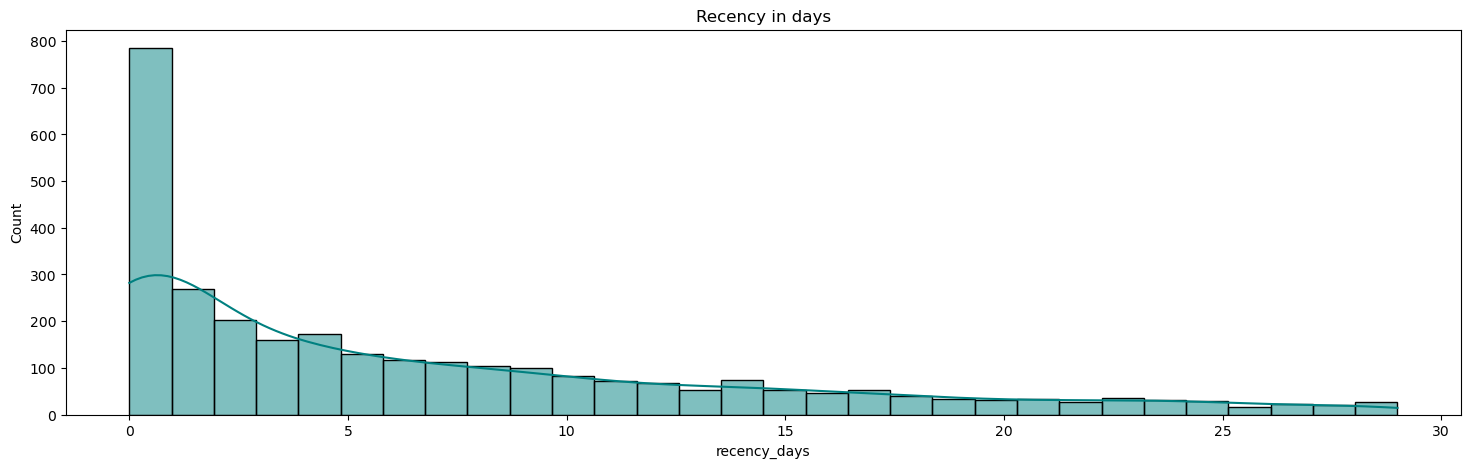

In [104]:
plt.figure(figsize=(18,5))
sns.histplot(x="recency_days", data=model_df, color="teal", bins=30, kde=True)
plt.title("Recency in days")
plt.show()

##### Insight
The recency distribution is heavily right-skewed, with most customers most customers are still actively using the service, but a smaller group has not used it for several weeks. These inactive customers represent the highest churn risk and should be prioritised for retention efforts.

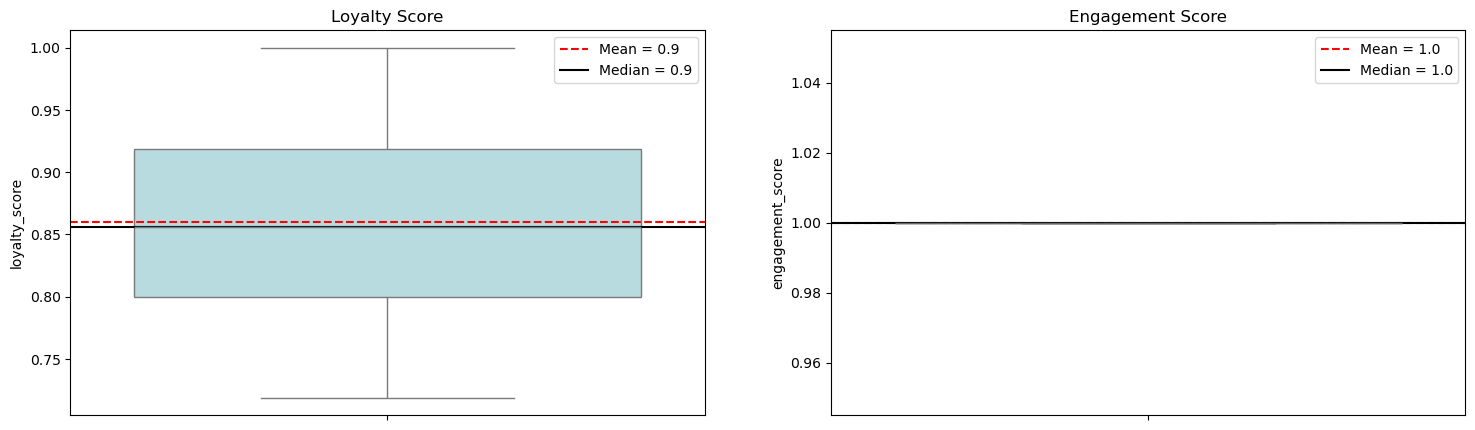

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
ax = ax.flatten()

# Loyalty Score
sns.boxplot(y="loyalty_score", data=model_df, color="powderblue", ax=ax[0])

mean_days = model_df["loyalty_score"].mean()
median_days = model_df["loyalty_score"].median()

ax[0].axhline(mean_days, color="red", linestyle="--", label=f"Mean = {mean_days:.1f}")
ax[0].axhline(median_days, color="black", linestyle="-", label=f"Median = {median_days:.1f}")

ax[0].set_title("Loyalty Score")
ax[0].legend()

# Engagement Score
sns.boxplot(y="engagement_score", data=model_df, color="sandybrown", ax=ax[1])

mean_trips = model_df["engagement_score"].mean()
median_trips = model_df["engagement_score"].median()

ax[1].axhline(mean_trips, color="red", linestyle="--", label=f"Mean = {mean_trips:.1f}")
ax[1].axhline(median_trips, color="black", linestyle="-", label=f"Median = {median_trips:.1f}")

ax[1].set_title("Engagement Score")
ax[1].legend()

plt.show()

##### Insight
Most customers show strong loyalty, but a smaller subset has significantly lower loyalty scores, indicating higher churn risk.
The engagement score is capped at its maximum for most users, making it difficult to distinguish between active and at-risk customers.

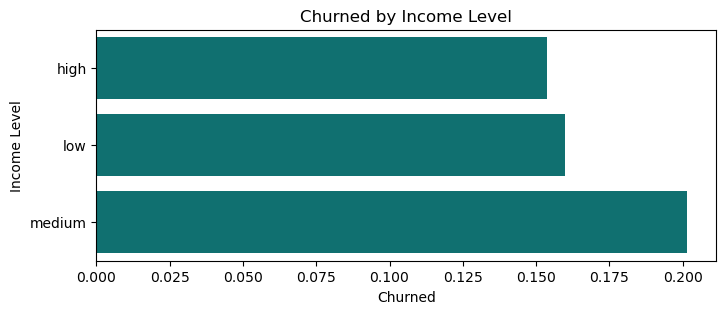

In [106]:
plt.figure(figsize=(8,3))
sns.barplot(x="churned", y="income_level", data=model_df, color="teal", errorbar=None)
plt.title("Churned by Income Level")
plt.xlabel("Churned")
plt.ylabel("Income Level")
plt.show()

##### Insight
Medium income group churn more, while high income customer more reliable.

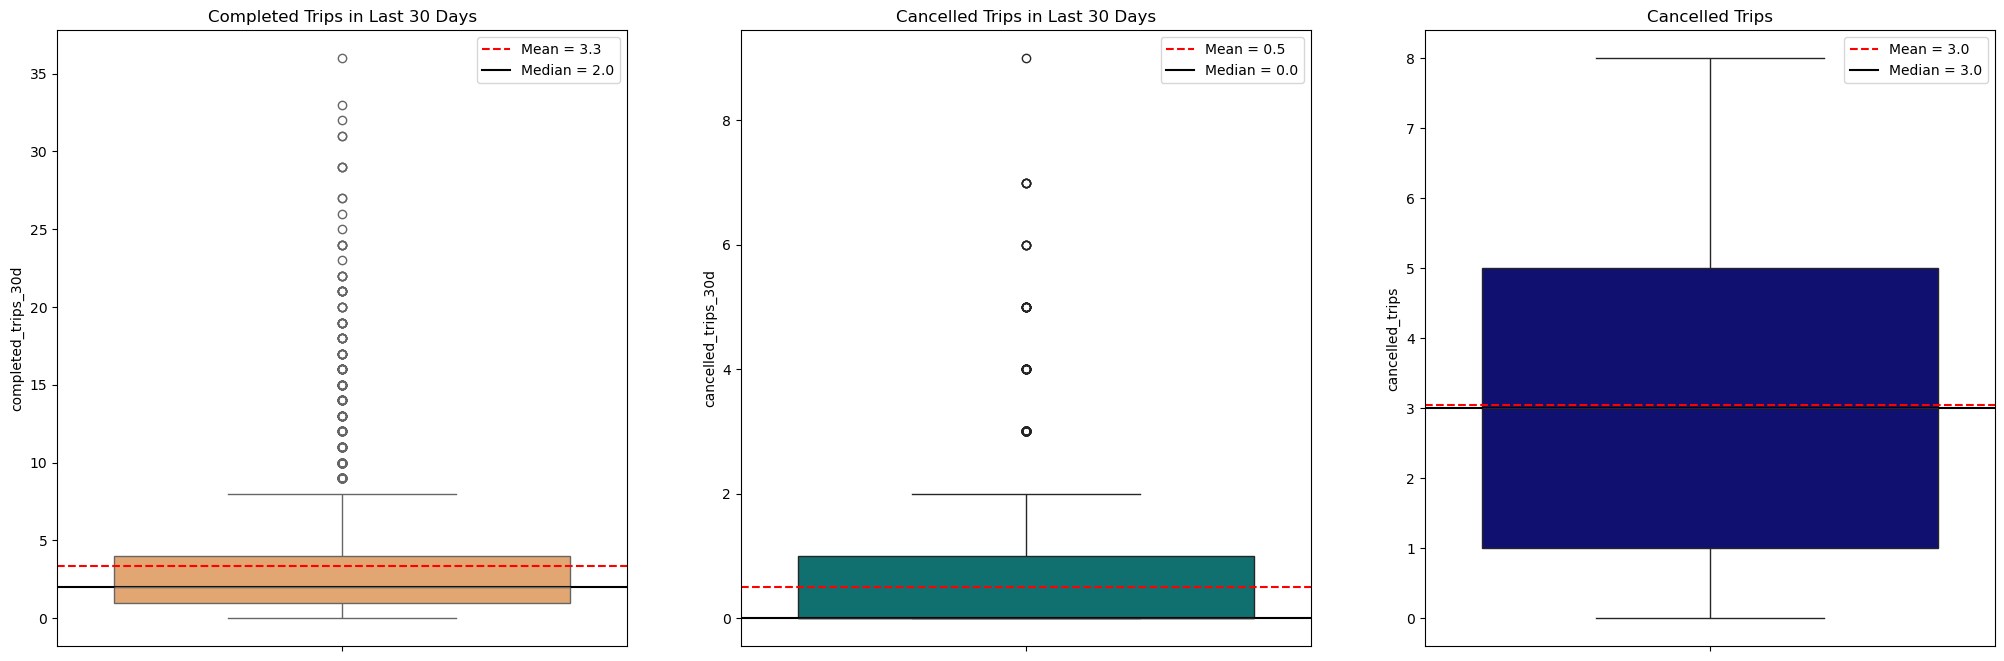

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
ax = ax.flatten()

# Completed Trips in Last 30 Days
sns.boxplot(y="completed_trips_30d", data=model_df, color="sandybrown", ax=ax[0])

mean_days = model_df["completed_trips_30d"].mean()
median_days = model_df["completed_trips_30d"].median()

ax[0].axhline(mean_days, color="red", linestyle="--", label=f"Mean = {mean_days:.1f}")
ax[0].axhline(median_days, color="black", linestyle="-", label=f"Median = {median_days:.1f}")

ax[0].set_title("Completed Trips in Last 30 Days")
ax[0].legend()

# Canceled Trips in Last 30 Days
sns.boxplot(y="cancelled_trips_30d", data=model_df, color="teal", ax=ax[1])

mean_trips = model_df["cancelled_trips_30d"].mean()
median_trips = model_df["cancelled_trips_30d"].median()

ax[1].axhline(mean_trips, color="red", linestyle="--", label=f"Mean = {mean_trips:.1f}")
ax[1].axhline(median_trips, color="black", linestyle="-", label=f"Median = {median_trips:.1f}")

ax[1].set_title("Cancelled Trips in Last 30 Days")
ax[1].legend()

# Canceled Trips 
sns.boxplot(y="cancelled_trips", data=model_df, color="navy", ax=ax[2])

mean_trips = model_df["cancelled_trips"].mean()
median_trips = model_df["cancelled_trips"].median()

ax[2].axhline(mean_trips, color="red", linestyle="--", label=f"Mean = {mean_trips:.1f}")
ax[2].axhline(median_trips, color="black", linestyle="-", label=f"Median = {median_trips:.1f}")

ax[2].set_title("Cancelled Trips")
ax[2].legend()


plt.show()

##### Insight
While engagement and loyalty scores remain high, actual ride usage is low, suggesting many customers are still interacting with the app but not converting into completed trips. This indicates early-stage disengagement rather than full churn.

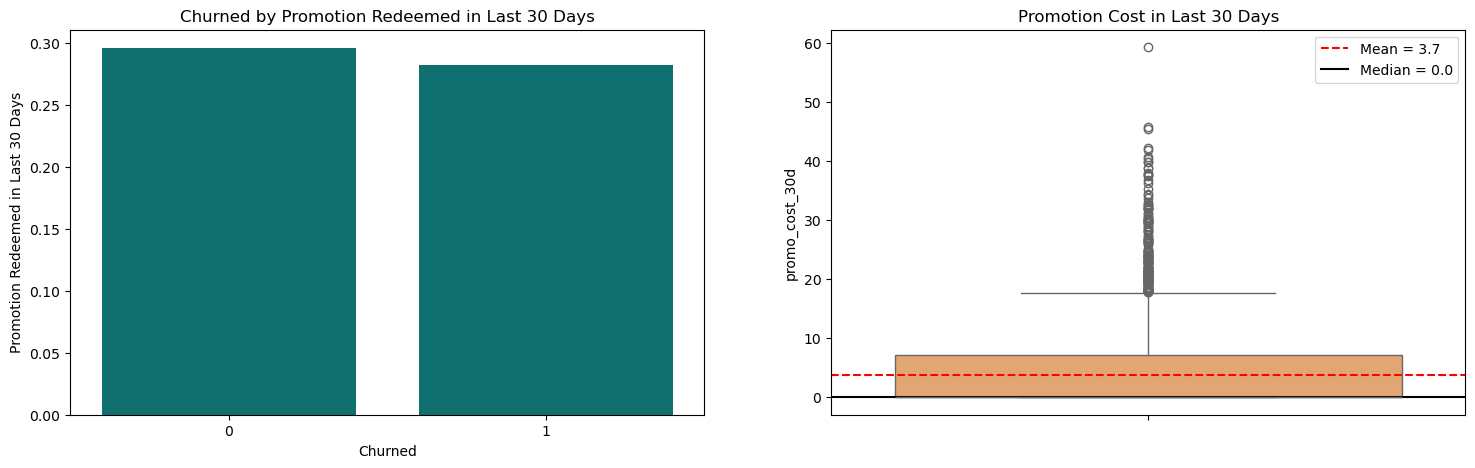

In [108]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(18,5))
ax = ax.flatten()

# Promotion Redeemed in Last 30 Days
sns.barplot(x="churned", y="promos_redeemed_30d", data=model_df, color="teal", errorbar=None, ax=ax[0])
ax[0].set_title("Churned by Promotion Redeemed in Last 30 Days")
ax[0].set_xlabel("Churned")
ax[0].set_ylabel("Promotion Redeemed in Last 30 Days")

# Promotion Cost in Last 30 Days
sns.boxplot(y="promo_cost_30d", data=model_df, color="sandybrown", ax=ax[1])

mean_trips = model_df["promo_cost_30d"].mean()
median_trips = model_df["promo_cost_30d"].median()

ax[1].axhline(mean_trips, color="red", linestyle="--", label=f"Mean = {mean_trips:.1f}")
ax[1].axhline(median_trips, color="black", linestyle="-", label=f"Median = {median_trips:.1f}")

ax[1].set_title("Promotion Cost in Last 30 Days")
ax[1].legend()

plt.show()

##### Insight
Promotions redeemed in the last 30 days are only slightly lower for churned customers, suggesting promotions have a limited impact on preventing churn.
At the same time,the business is spending disproportionately more promotions on a small subset of customers.